In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
from Dataset import Dataset
from Module import ConvNet, SoftMaxWithCrossEntropy,Optimaizer
IMAGEFLODERPATH = r'Dataset/Ankit_CV_Datasetv2/dataset/'
MASKEDIMGPATH =  r'*_masked/*.jpg'
PARTIALMASKEDIMGPATH = r'*_partialmasked/*.jpg'
UNMASKEDIMGPATH = r'*_unmasked/*.jpg'

### dataset

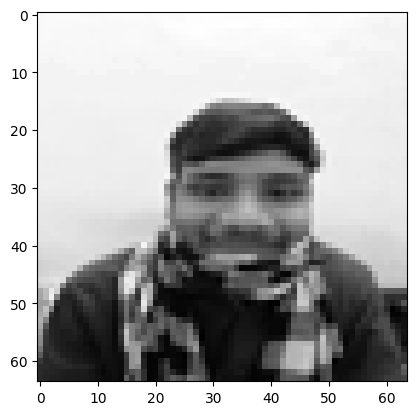

1
1956
(64, 64)


In [2]:
data = Dataset(IMAGEFLODERPATH,MASKEDIMGPATH,PARTIALMASKEDIMGPATH,UNMASKEDIMGPATH,color=False)
plt.imshow(data[0],'gray')
plt.show()
print(data.label(0))
print(len(data))
print(data[0].shape)

In [3]:
Network = ConvNet(1,3)
optim = Optimaizer(Network,1e-8)
sowc = SoftMaxWithCrossEntropy()
Loss = []

In [4]:
P = Network.forward(data[0][np.newaxis,np.newaxis,:])
print(np.argmax(P))

0


In [5]:
def drowgraph(X,Y) :
    plt.plot(X,color='green')
    plt.plot(Y)
    plt.show()

In [6]:
for j in range(50) :
    data.random()
    print(j)
    SLoss = 0
    for i in range(int(len(data)*2/3)) :
        D = data[i][np.newaxis,np.newaxis,:]
        A = Network.forward(D)
        L = np.zeros(3)
        L[data.label(i)] = 1
        L = sowc.forward(A, data.label(i))
        B = sowc.backward()
        B = Network.backward(B)
        optim.step()
        SLoss += L
        if i%100==0 :
            print(i, " ", L)
        else :
            pass
    Loss.append(SLoss/len(data))


0
0   0.0
100   0.0
200   8.330409689859529
300   7.541112423746989
400   7.431126108631325
500   3.8319575153515584
600   4.155918566886054
700   0.0
800   3.940501192641045
900   0.0
1000   4.116634311552334
1100   0.0
1200   0.0
1300   7.8646534571829925
1
0   7.860179086932315
100   0.0
200   4.189157276178488
300   7.556730509000063
400   4.038419242466842
500   0.0
600   4.742165805853616
700   7.736941037261558
800   3.7626415801422097
900   7.924477892018439
1000   4.003746971617536
1100   0.0
1200   7.46473497584585
1300   3.483396316769484
2
0   7.262483373424706
100   7.384631741689362
200   3.8049568323110945
300   0.0
400   3.768898917399752
500   0.0
600   0.0
700   6.807600304094864
800   0.0
900   0.0
1000   7.641211732206562
1100   4.190327685064136
1200   3.871653907600462
1300   0.0
3
0   7.117818426769745
100   6.874634772808635
200   3.4244990451396156
300   0.0
400   6.75456527191799
500   6.92591426708257
600   3.461423144139159
700   3.9060462985231927
800   3.5

In [10]:
Accuracy = 0

for i in range(len(data)) :
    D = data[i][np.newaxis, np.newaxis,:]
    A = Network.forward(D)
    if np.argmax(A) == data.label(i) :
        Accuracy += 1
    print(np.argmax(A))

print("Accuracy : ",Accuracy)

0
0
1
1
1
0
0
0
0
0
0
0
0
0
2
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
2
0
1
0
0
0
0
0
1
0
0
1
0
0
0
1
1
0
0
1
1
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
1
0
2
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
1
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
2
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
2
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
1
0
2
1
0
0
0
0
0
0
0
0
2
0
1
0
0
0
0
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
0
0
1
1
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
2
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0


In [11]:
print(Accuracy/len(data))

0.3169734151329243
